 📊 **Mental Health in the Workplace - EDA Project**
## A Data Analyst's Exploration into Employee Well-being

Welcome! In this notebook, we explore a dataset focused on **mental health in workplace environments**.  
As data analysts, it's our goal to uncover insights that can help **companies foster healthier, more supportive workspaces**.



# 1. استيراد البيانات وفهم هيكلها - Data Loading & Structure


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('/content/mental_health0.csv' , sep=";" )
df.head().T

,0,1,2,3,4
EmployeeID,1001,1002,1003,1004,1005
Age,50,36,29,42,40
Gender,Male,Male,NaN,Male,Male
Country,UK,Germany,India,Australia,Brazil
JobRole,Sales Associate,Software Engineer,IT Admin,HR Specialist,Customer Support
Department,HR,IT,IT,IT,Support
YearsAtCompany,14,1,13,15,6
WorkHoursPerWeek,47,59,59,31,34
RemoteWork,No,Hybrid,Hybrid,Yes,Yes
BurnoutLevel,2,8,7,2,8


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3080 non-null   int64  
 1   Age                     3080 non-null   int64  
 2   Gender                  2298 non-null   object 
 3   Country                 3080 non-null   object 
 4   JobRole                 3080 non-null   object 
 5   Department              3080 non-null   object 
 6   YearsAtCompany          3080 non-null   int64  
 7   WorkHoursPerWeek        3080 non-null   int64  
 8   RemoteWork              3080 non-null   object 
 9   BurnoutLevel            3080 non-null   int64  
 10  JobSatisfaction         3080 non-null   float64
 11  StressLevel             3080 non-null   int64  
 12  ProductivityScore       3080 non-null   float64
 13  SleepHours              2996 non-null   float64
 14  PhysicalActivityHrs     3080 non-null   

(3080, 23)

In [ ]:
# التحقق من القيم المفقودة والمكررة

missing_values = df.isnull().sum()
duplicated_rows = df.duplicated().sum()

print(" عدد القيم المفقودة في كل عمود:")
print(missing_values)

print("\n عدد الصفوف المكررة في البيانات:")
print(duplicated_rows)


 عدد القيم المفقودة في كل عمود:
EmployeeID                  0
Age                         0
Gender                    782
Country                     0
JobRole                     0
Department                  0
YearsAtCompany              0
WorkHoursPerWeek            0
RemoteWork                  0
BurnoutLevel                0
JobSatisfaction             0
StressLevel                 0
ProductivityScore           0
SleepHours                 84
PhysicalActivityHrs         0
CommuteTime                 0
HasMentalHealthSupport      0
ManagerSupportScore         0
HasTherapyAccess            0
MentalHealthDaysOff         0
SalaryRange                 0
WorkLifeBalanceScore        0
CareerGrowthScore          52
dtype: int64

 عدد الصفوف المكررة في البيانات:
0


# 2. تنظيف البيانات وتجهيزها - Data Cleaning & Preparation







In [ ]:
# تعويض القيمه النصية الناقصة بالقيمة الأكثر تكرارًا
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
# تعويض بالمتوسط
df['SleepHours'].fillna(df['SleepHours'].mean(), inplace=True)
# تعويض بالوسيط
df['CareerGrowthScore'].fillna(df['CareerGrowthScore'].median(), inplace=True)

/tmp/ipython-input-640945335.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-640945335.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [ ]:
# حذف الصفوف المكررة
df.drop_duplicates(inplace=True)
print(": بعد التنظيف، القيم المفقودة في كل عمود ")
print(df.isnull().sum())
print(": بعد التنظيف، القيم المكرره في كل صف ")
print(df.duplicated().sum())

: بعد التنظيف، القيم المفقودة في كل عمود 
EmployeeID                0
Age                       0
Gender                    0
Country                   0
JobRole                   0
Department                0
YearsAtCompany            0
WorkHoursPerWeek          0
RemoteWork                0
BurnoutLevel              0
JobSatisfaction           0
StressLevel               0
ProductivityScore         0
SleepHours                0
PhysicalActivityHrs       0
CommuteTime               0
HasMentalHealthSupport    0
ManagerSupportScore       0
HasTherapyAccess          0
MentalHealthDaysOff       0
SalaryRange               0
WorkLifeBalanceScore      0
CareerGrowthScore         0
dtype: int64
: بعد التنظيف، القيم المكرره في كل صف 
0


# 3.  التحليل الوصفي - Descriptive Analysis


In [ ]:
# وصف إحصائي للبيانات الرقمية (mean, median, std)
df.drop(columns=['EmployeeID']).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3080.0,40.824351,11.039772,22.0,31.0000,41.000000,50.0000,59.00
YearsAtCompany,3080.0,10.115260,6.034169,0.0,5.0000,10.000000,15.0000,20.00
WorkHoursPerWeek,3080.0,44.474675,8.485090,30.0,37.0000,44.500000,52.0000,59.00
BurnoutLevel,3080.0,5.474026,2.753245,1.0,3.0000,5.000000,8.0000,10.00
JobSatisfaction,3080.0,5.343260,2.686363,1.0,3.1300,5.370000,7.4700,10.00
StressLevel,3080.0,5.514935,2.797096,1.0,3.0000,5.000000,8.0000,10.00
ProductivityScore,3080.0,5.510042,2.604973,1.0,3.2800,5.470000,7.7900,10.00
SleepHours,3080.0,6.547029,1.421983,4.0,5.3000,6.547029,7.7000,9.00
PhysicalActivityHrs,3080.0,5.451747,2.479585,1.0,3.3400,5.500000,7.7500,9.46
CommuteTime,3080.0,59.179545,34.703185,0.0,29.0000,59.000000,89.0000,119.00


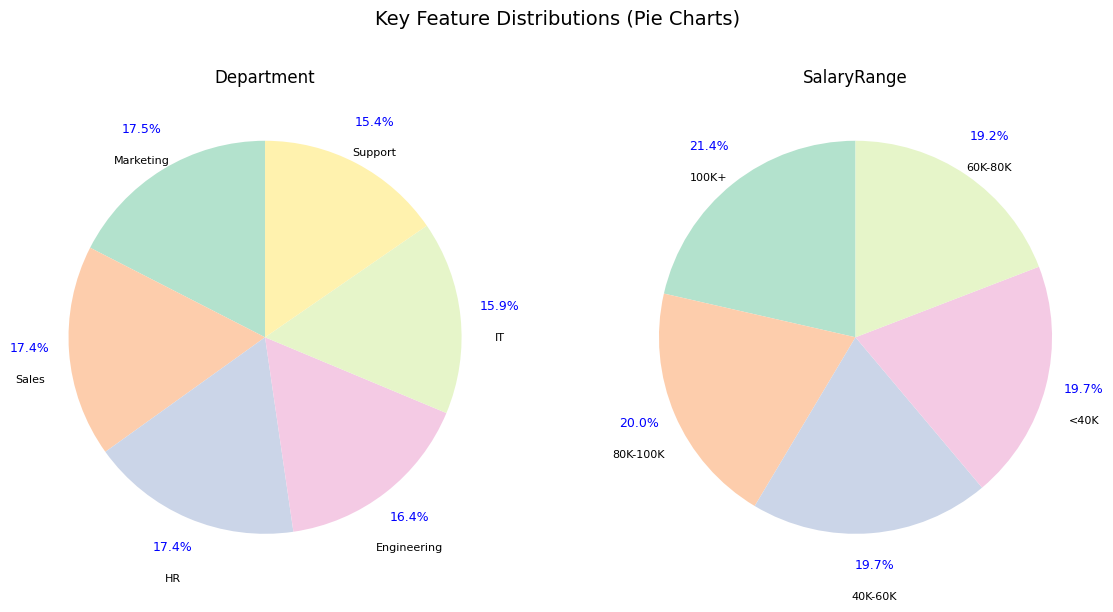

In [ ]:
# تحليل تكراري
import matplotlib.pyplot as plt
import numpy as np

# اختر عمودين فقط
key_columns = ['Department', 'SalaryRange']

# إنشاء 1 صف × 2 أعمدة
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, col in enumerate(key_columns):
    counts = df[col].value_counts(dropna=False)
    sizes = counts.values
    labels = counts.index
    total = sizes.sum()

    # رسم الدائرة
    wedges, _ = axes[i].pie(
        sizes,
        labels=None,
        startangle=90,
        colors=plt.cm.Pastel2.colors
    )

    # النسبة المئوية + اسم الفئة
    for j, wedge in enumerate(wedges):
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = np.cos(np.deg2rad(angle)) * 1.2
        y = np.sin(np.deg2rad(angle)) * 1.2
        pct = f'{(sizes[j]/total)*100:.1f}%'
        axes[i].text(x, y, pct, ha='center', va='bottom', fontsize=9, color='Blue')
        axes[i].text(x, y - 0.1, str(labels[j]), ha='center', va='top', fontsize=8, color='black')

    axes[i].set_title(col, fontsize=12)

plt.suptitle('Key Feature Distributions (Pie Charts)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


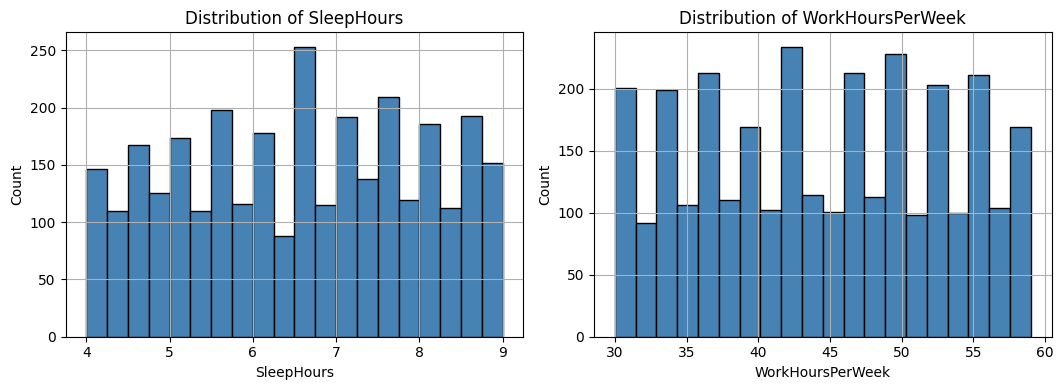

In [ ]:
#   تحليل البيانات للمتغيرات المستمرة (Categorical Variables)
# توزيع ساعات النوم، ساعات العمل،
continuous_cols = ['SleepHours', 'WorkHoursPerWeek']

plt.figure(figsize=(16, 4))
for i, col in enumerate(continuous_cols):
    plt.subplot(1, 3, i+1)
    df[col].hist(bins=20, color='steelblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


# 4.  التحليل الاستكشافي - Exploratory Data Analysis


In [ ]:
# تصفية شرطية للإستكشاف
# and
filtered1 = df[(df["JobRole"] == "IT Admin") & (df["HasMentalHealthSupport"] == "Yes") & (df["BurnoutLevel"] >= 7)]
print(f"\n عدد الصفوف التي تطابق الشروط: {len(filtered1)}")
# or
filtered2 =df[(df["HasMentalHealthSupport"] == "Yes") | (df["HasTherapyAccess"] == "Yes")]
print(f"\n عدد الصفوف التي تطابق الشروط: {len(filtered2)}")


 عدد الصفوف التي تطابق الشروط: 61

 عدد الصفوف التي تطابق الشروط: 2268


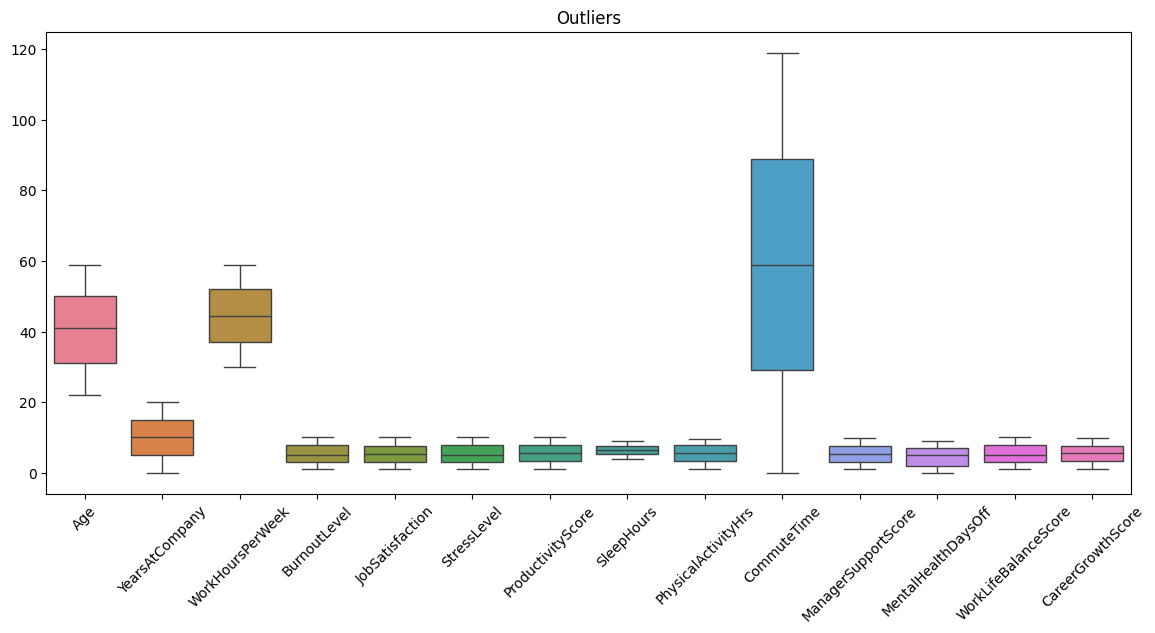

In [ ]:
# التحقق من القيم المتطرفة
numeric_df = df.drop(columns=["EmployeeID"]).select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(14, 6))
sns.boxplot(data=numeric_df)
plt.title("Outliers")
plt.xticks(rotation=45)
plt.show()

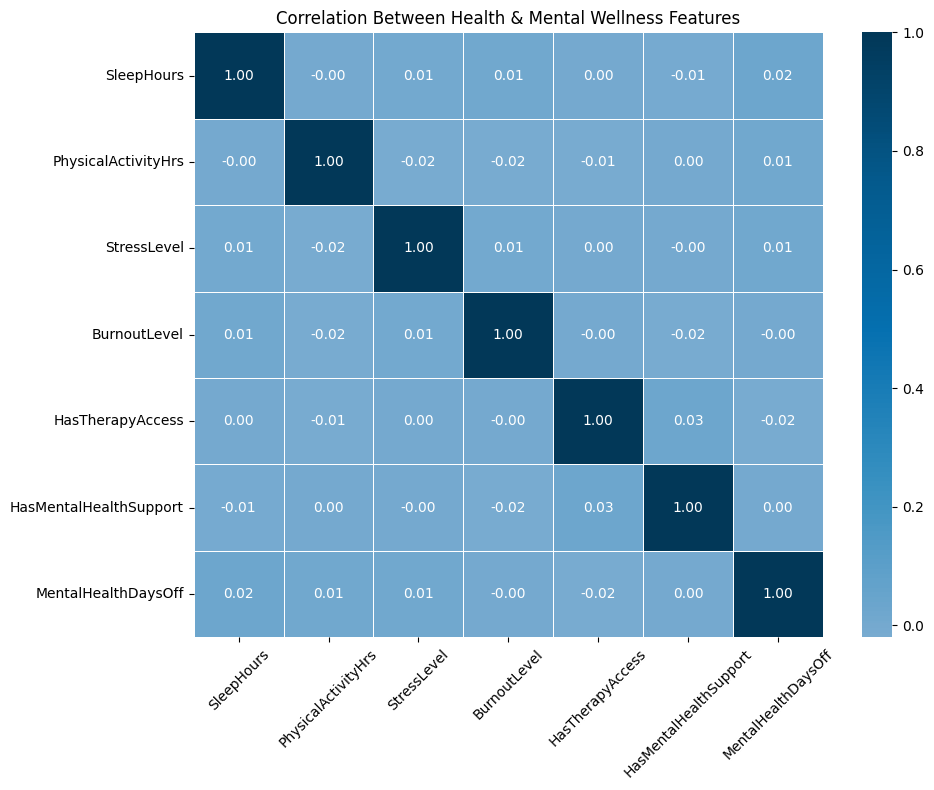

In [ ]:
# 1. التحليل الصحي والنفسي
health_df = df[[
    'SleepHours',
    'PhysicalActivityHrs',
    'StressLevel',
    'BurnoutLevel',
    'HasTherapyAccess',
    'HasMentalHealthSupport',
    'MentalHealthDaysOff'
]].copy()

# تحويل النصوص إلى أرقام
health_df['HasTherapyAccess'] = health_df['HasTherapyAccess'].map({'Yes': 1, 'No': 0})
health_df['HasMentalHealthSupport'] = health_df['HasMentalHealthSupport'].map({'Yes': 1, 'No': 0})

# حساب مصفوفة الارتباط
corr_matrix = health_df.corr()

# رسم Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='PuBu', center=0, fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Health & Mental Wellness Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-500723445.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




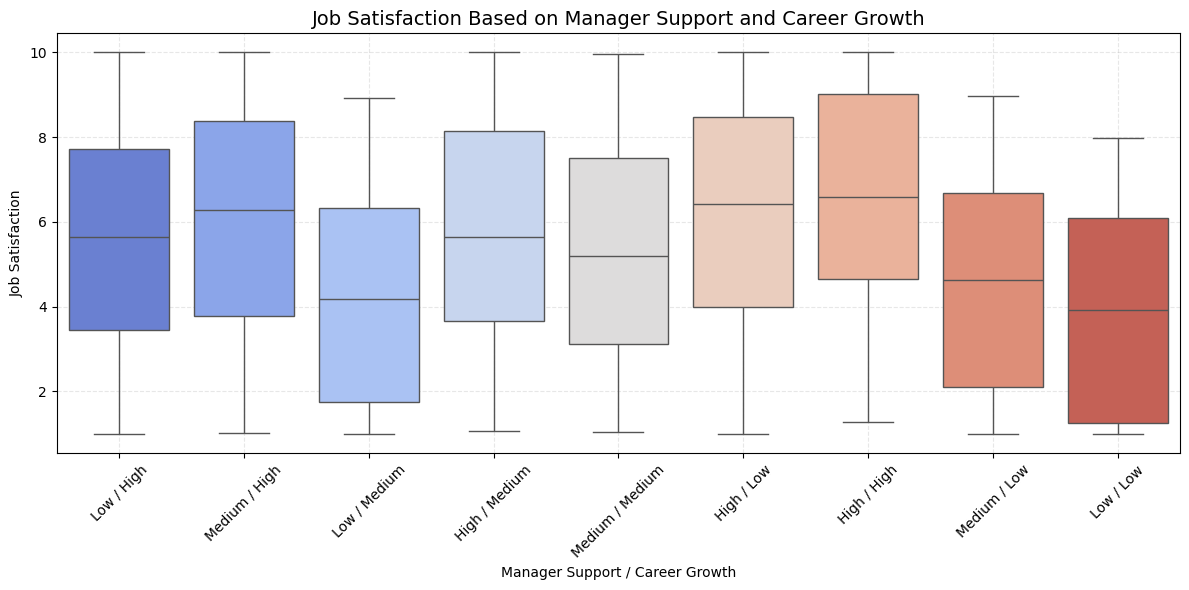

In [ ]:
#  2.تحليل الإنتاجيه والاداء
# تصنيف Manager Support إلى فئات: Low, Medium, High
df['ManagerSupportLevel'] = pd.cut(df['ManagerSupportScore'],
                                   bins=[0, 4, 7, 10],
                                   labels=['Low', 'Medium', 'High'])

# تصنيف Career Growth إلى فئات
df['CareerGrowthLevel'] = pd.cut(df['CareerGrowthScore'],
                                 bins=[0, 4, 7, 10],
                                 labels=['Low', 'Medium', 'High'])
# دمج الفئتين في عمود واحد
df['Support_and_Growth'] = df['ManagerSupportLevel'].astype(str) + ' / ' + df['CareerGrowthLevel'].astype(str)

# حذف الصفوف التي فيها قيم مفقودة بعد التصنيف
plot_df = df.dropna(subset=['Support_and_Growth', 'JobSatisfaction'])

# رسم Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_df,
            x='Support_and_Growth',
            y='JobSatisfaction',
            palette='coolwarm')

# تنسيقات العنوان والمحاور
plt.title('Job Satisfaction Based on Manager Support and Career Growth', fontsize=14)
plt.xlabel('Manager Support / Career Growth')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# 5.  التحليل الإحصائي - Statistical Analysis


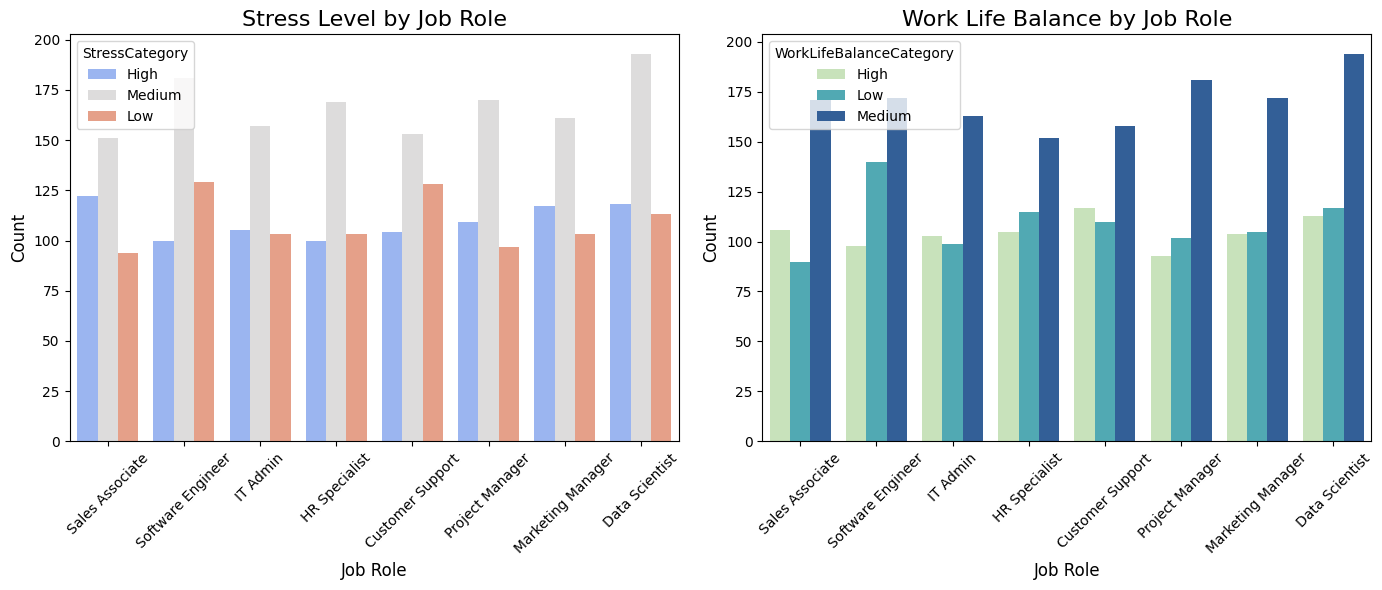

In [ ]:
# 3. تحليل بيئة العمل والراحه
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# تحويل القيم إلى فئات
def categorize_stress(stress):
    if stress <= 3:
        return 'Low'
    elif 4 <= stress <= 7:
        return 'Medium'
    else:
        return 'High'

def categorize_work_life_balance(balance):
    if balance <= 3:
        return 'Low'
    elif 4 <= balance <= 7:
        return 'Medium'
    else:
        return 'High'

# تطبيق الفئات على الأعمدة
df['StressCategory'] = df['StressLevel'].apply(categorize_stress)
df['WorkLifeBalanceCategory'] = df['WorkLifeBalanceScore'].apply(categorize_work_life_balance)

# إعداد الشكل لاحتواء الرسمين بشكل منفصل
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# رسم Count Plot لعرض التوتر حسب نوع الوظيفة (رسم أول)
sns.countplot(x='JobRole', hue='StressCategory', data=df, ax=axes[0], palette="coolwarm")
axes[0].set_title('Stress Level by Job Role', fontsize=16)
axes[0].set_xlabel('Job Role', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# رسم Count Plot لعرض توازن الحياة والعمل حسب نوع الوظيفة (رسم ثاني)
sns.countplot(x='JobRole', hue='WorkLifeBalanceCategory', data=df, ax=axes[1], palette="YlGnBu")
axes[1].set_title('Work Life Balance by Job Role', fontsize=16)
axes[1].set_xlabel('Job Role', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# ضبط المسافات بين الرسمين
plt.tight_layout()

# عرض الرسم
plt.show()

 أعلى 20 بروفايلات من حيث مستوى الإرهاق مع مستوى الرضا الوظيفي:

   Person Gender AgeGroup SalaryRange ExperienceGroup  Department  BurnoutLevel  JobSatisfaction
 Person 1 Female    36-45     60K-80K             3-5          IT          10.0             4.70
 Person 2   Male    46-60     40K-60K            6-10 Engineering          10.0             4.89
 Person 3 Female    36-45     60K-80K             nan   Marketing          10.0             8.21
 Person 4   Male    46-60     40K-60K             3-5       Sales          10.0            10.00
 Person 5 Female    18-25     60K-80K             nan          HR          10.0             7.95
 Person 6 Female    36-45        <40K             nan Engineering          10.0             4.86
 Person 7 Female    25-35    80K-100K             nan       Sales          10.0             9.50
 Person 8   Male    25-35     40K-60K            6-10 Engineering          10.0             5.46
 Person 9 Female    25-35     40K-60K             0-2     Supp

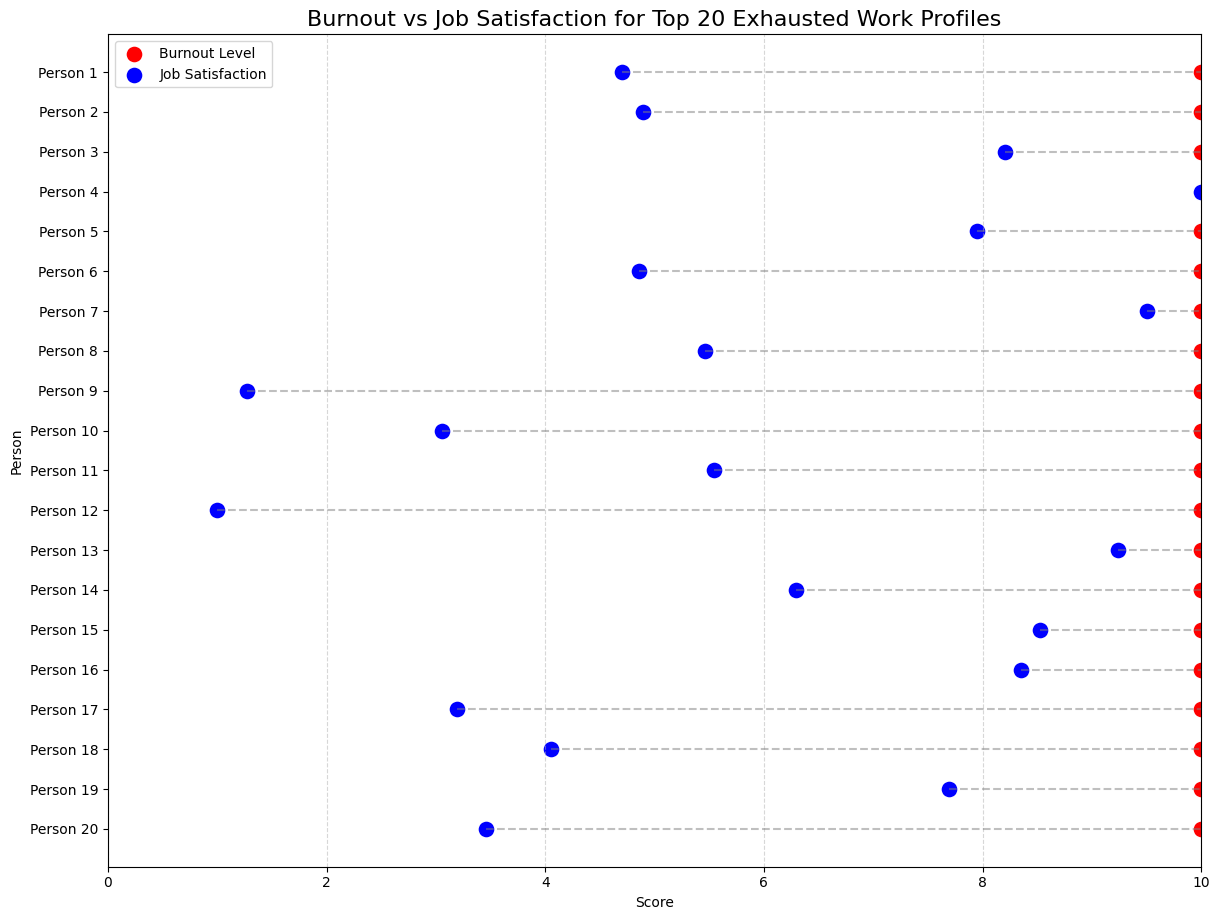

In [ ]:
# 4. تحليل السمات الوظيفيه ومدى تاثيرها
#تقسيم العمر والخبره الى فئات
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 60], labels=['18-25', '25-35', '36-45', '46-60'])
df['ExperienceGroup'] = pd.cut(df['YearsAtCompany'], bins=[0, 2, 5, 10, 50], labels=['0-2', '3-5', '6-10', '+10'])

# تحويل الأعمدة الرقمية إلى نصوص قبل دمجها
df['WorkProfile'] = (
    df['Gender'].astype(str) + ' | ' +
    df['AgeGroup'].astype(str) + ' | ' +
    df['SalaryRange'].astype(str) + ' | ' +
    df['ExperienceGroup'].astype(str) + ' | ' +
    df['Department'].astype(str)
)

# حساب متوسط الإرهاق والرضا الوظيفي لكل بروفايل
profile_summary = df.groupby('WorkProfile')[['BurnoutLevel', 'JobSatisfaction']].mean().round(2)

# استخراج أعلى 20 بروفايل من حيث الإرهاق
top_profiles_df = profile_summary.sort_values(by='BurnoutLevel', ascending=False).head(20).reset_index()

# فصل WorkProfile إلى أعمدة منفصلة
profile_parts = top_profiles_df['WorkProfile'].str.split(' \| ', expand=True)
profile_parts.columns = ['Gender', 'AgeGroup', 'SalaryRange', 'ExperienceGroup', 'Department']

# دمج التفاصيل مع القيم
top_profiles_df = pd.concat([profile_parts, top_profiles_df[['BurnoutLevel', 'JobSatisfaction']]], axis=1)

# إضافة عمود لتسهيل قراءه البروفايلات'Person'
top_profiles_df['Person'] = ['Person ' + str(i) for i in range(1, len(top_profiles_df) + 1)]
cols = ['Person'] + [col for col in top_profiles_df.columns if col != 'Person']
top_profiles_df = top_profiles_df[cols]

# عرض النتائج النهائية
print(f" أعلى {len(top_profiles_df)} بروفايلات من حيث مستوى الإرهاق مع مستوى الرضا الوظيفي:\n")
print(top_profiles_df.to_string(index=False))


plt.figure(figsize=(12, 9))  # قللت العرض شوية والارتفاع زدته ليتناسب مع عدد الأشخاص

# نقاط الإرهاق باستخدام أسماء الأشخاص
sns.scatterplot(
    data=top_profiles_df,
    x='BurnoutLevel',
    y='Person',
    s=150,
    color='red',
    label='Burnout Level'
)

# نقاط الرضا باستخدام أسماء الأشخاص
sns.scatterplot(
    data=top_profiles_df,
    x='JobSatisfaction',
    y='Person',
    s=150,
    color='blue',
    label='Job Satisfaction'
)

# خطوط ربط بين النقطتين لكل شخص
for _, row in top_profiles_df.iterrows():
    plt.plot([row['JobSatisfaction'], row['BurnoutLevel']],
             [row['Person'], row['Person']],
             color='gray', linestyle='--', alpha=0.5)

plt.title(f'Burnout vs Job Satisfaction for Top {len(top_profiles_df)} Exhausted Work Profiles', fontsize=16)
plt.xlabel('Score')
plt.ylabel('Person')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xlim(0, 10)

plt.tight_layout(pad=0)

plt.show()

# 6.  التصور البياني - Data Visualization


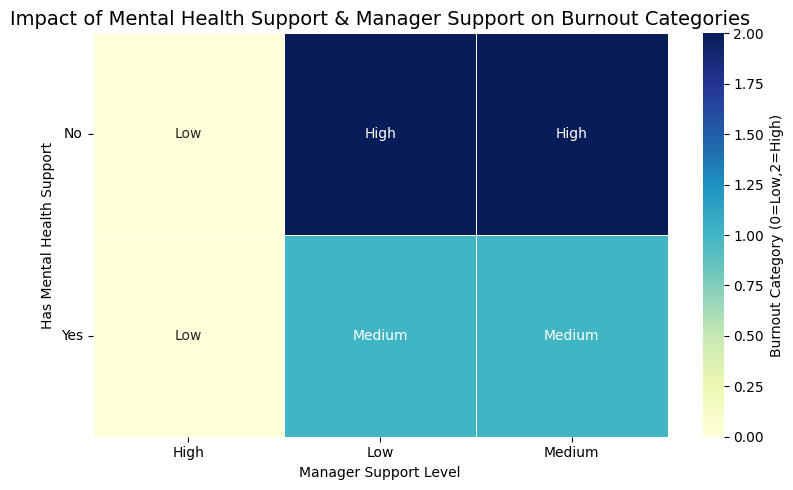

In [ ]:

def categorize_support(score):
    if score <= 3:
        return 'Low'
    elif score <= 7:
        return 'Medium'
    else:
        return 'High'

df['ManagerSupportLevel'] = df['ManagerSupportScore'].apply(categorize_support)

pivot_table = df.groupby(['HasMentalHealthSupport', 'ManagerSupportLevel'])['BurnoutLevel'].mean().reset_index()

# حساب الرباعيات للمتوسطات
q1 = pivot_table['BurnoutLevel'].quantile(0.25)
q3 = pivot_table['BurnoutLevel'].quantile(0.75)

def categorize_burnout_quantiles(avg_score):
    if avg_score <= q1:
        return 'Low'
    elif avg_score <= q3:
        return 'Medium'
    else:
        return 'High'

pivot_table['BurnoutCategory'] = pivot_table['BurnoutLevel'].apply(categorize_burnout_quantiles)

pivot_pivot = pivot_table.pivot(index='HasMentalHealthSupport', columns='ManagerSupportLevel', values='BurnoutCategory')

category_to_num = {'Low': 0, 'Medium': 1, 'High': 2}
pivot_numeric = pivot_table.copy()
pivot_numeric['BurnoutNum'] = pivot_numeric['BurnoutCategory'].map(category_to_num)
pivot_numeric_pivot = pivot_numeric.pivot(index='HasMentalHealthSupport', columns='ManagerSupportLevel', values='BurnoutNum')

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_numeric_pivot, annot=pivot_pivot, fmt='', cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Burnout Category (0=Low,2=High)'})

plt.title('Impact of Mental Health Support & Manager Support on Burnout Categories', fontsize=14)
plt.xlabel('Manager Support Level')
plt.ylabel('Has Mental Health Support')
plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# حساب المتوسط لكل دولة
burnout_by_country = df.groupby("Country")["BurnoutLevel"].mean().reset_index()
burnout_by_country.columns = ['Country', 'AverageBurnout']

# تقسيم Burnout إلى 6 فئات حسب التوزيع (Quantiles)
quantile_bins = pd.qcut(
    burnout_by_country['AverageBurnout'],
    q=6,
    labels=["Very Low", "Low", "Moderate", "Medium High", "High", "Very High"]
)

burnout_by_country["BurnoutCategory"] = quantile_bins

# ألوان مناسبة لكل فئة
category_colors = {
    "Very Low": "#c6dbef",
    "Low": "#9ecae1",
    "Moderate": "#6baed6",
    "Medium High": "#4292c6",
    "High": "#2171b5",
    "Very High": "#084594"
}

# رسم الخريطة التفاعلية
fig = px.choropleth(
    burnout_by_country,
    locations="Country",
    locationmode="country names",
    color="BurnoutCategory",
    color_discrete_map=category_colors,
    hover_name="Country"
)

# ضبط التصميم
fig.update_layout(
    geo=dict(
        showframe=False,
        projection_type='natural earth'
    ),
    title=dict(
        text="Burnout Levels by Country (Quantile-Based Categories)",
        x=0.5,
        y=0.92,
        xanchor='center',
        yanchor='top',
        font=dict(size=18)
    ),
    legend_title="Burnout Category",
    legend=dict(
        orientation="v",
        x=0.62,             # أقرب أكثر لداخل الخريطة
        xanchor="left",
        y=0.98,
        yanchor="top",
        bgcolor="rgba(255,255,255,0.7)",
        bordercolor="black",
        borderwidth=1
    ),
    margin=dict(t=60, l=0, r=0, b=0)
)

fig.show()


# 7.  الخاتمة والتوصيات - Conclusion & Recommendations

**قدم هذا التحليل رؤى أساسية حول الصحة النفسية في العمل، مبرزًا:**
* ارتباطًا مباشرًا بين التوتر والإرهاق.
* أهمية دعم المدير والنمو المهني للرضا الوظيفي.
* تباين الرضا رغم الإرهاق الشديد، وتأثير السمات الوظيفية.
* اختلاف مستويات الإرهاق وتوازن العمل/الحياة بين الأدوار والمواقع الجغرافية.

**بناءً عليه، نوصي بـ:**
1.  معالجة التوتر والإرهاق بفاعلية.
2.  تعزيز دعم المديرين ومسارات النمو.
3.  تحسين بيئات العمل عالية الضغط.
4.  فهم عوامل الرضا التي توازن الإرهاق.
5.  تخصيص استراتيجيات الدعم حسب الدول.

**الخطوات التالية: تحليل أعمق لبناء نماذج تنبؤية.**